In [1]:
%matplotlib inline

In [2]:
# Don't forget to create the training data with the create_training_data notebook.

In [3]:
# Load data
import pandas as pd
f_data = pd.read_csv("f.data", header=None)

# Print shape
print(f_data.shape)

(50, 2)


In [4]:
# Display a few examples of the data
f_data.head(10)

,0,1
0,362.423468,9.762701
1,1144.390022,43.037873
2,615.987868,20.552675
3,343.950960,8.976637
4,-225.822443,-15.269040
5,818.702331,29.178823
6,-160.340107,-12.482558
7,1974.333104,78.354600
8,2312.214974,92.732552
9,-414.824862,-23.311696


In [5]:
# Split data into features and labels because the next step shouldn't be applied to the labels
x_f = f_data.iloc[:, 1:] # contains features
x_f[0] = 1
y_f = f_data.iloc[:, 0] # contains labels

x_f.head(10)

,1,0
0,9.762701,1
1,43.037873,1
2,20.552675,1
3,8.976637,1
4,-15.269040,1
5,29.178823,1
6,-12.482558,1
7,78.354600,1
8,92.732552,1
9,-23.311696,1


In [6]:
# split data into training and test data
import numpy as np
from sklearn.model_selection import train_test_split
x_f_train, x_f_test, y_f_train, y_f_test = train_test_split(x_f, y_f, test_size=0.3, random_state=4)
y_f_train = np.expand_dims(y_f_train.to_numpy(), axis=1)
y_f_test = np.expand_dims(y_f_test.to_numpy(), axis=1)
x_f_train = x_f_train.to_numpy()
x_f_test = x_f_test.to_numpy()

print(x_f_train.shape)
print(y_f_train.shape)
print(x_f_test.shape)
print(y_f_test.shape)

(35, 2)
(35, 1)
(15, 2)
(15, 1)


In [7]:
# linear regression implementation
def compute_cost(x, y, theta):
    m = y.shape[0]
    return 1/(2 * m) * sum(np.power(np.matmul(x, theta) - y, 2))

def gradient_descent(x, y, theta=None, alpha=0.01, num_iters=100):
    m, n = x.shape
    if theta is None:
        theta = np.random.rand(n, 1) / 10 - 0.05

    costs = []
    for i in range(num_iters):
        theta -= alpha * (1 / m) * np.matmul(np.transpose(x), (np.matmul(x, theta) - y))
        costs.append(compute_cost(x, y, theta))

    return theta, costs

In [8]:
# train model
theta, costs = gradient_descent(x_f_train, y_f_train, alpha=0.0005, num_iters=20000)

In [9]:
# use model to predict classes of input data
def predict(x, theta):
    return np.matmul(x, theta)

In [10]:
# calculate prediction of test data
prediction = predict(x_f_test, theta)

In [11]:
# print the results
print([round(item) for sublist in prediction.tolist() for item in sublist][:40])
print([round(item) for sublist in y_f_test.tolist() for item in sublist][:40])

[-160, -734, 269, -226, 453, 1422, 1974, 791, -163, 1440, -48, 236, 455, -1808, -2122]
[-160, -734, 269, -226, 453, 1422, 1974, 791, -163, 1440, -48, 236, 455, -1807, -2122]


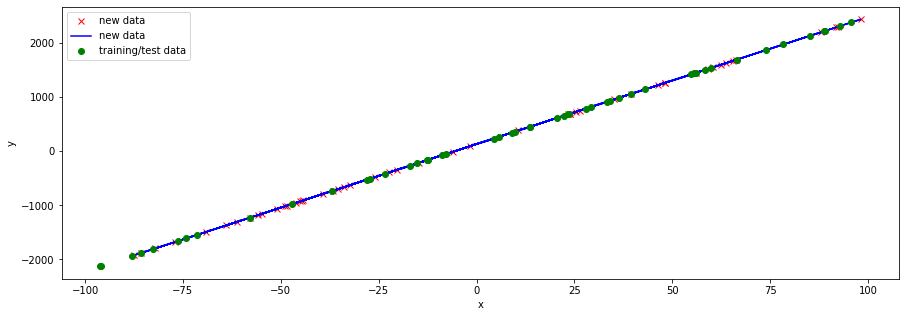

In [26]:
# plot training/test data and compare them with trained model
_x_f = np.random.random_sample((50,2)) * 200 - 100
_x_f[:,-1] = 1
_y_f = predict(_x_f, theta)

# plot 
import matplotlib.pyplot as plt
plt.figure(1, figsize=(15, 5))
plt.xlabel("x")
plt.ylabel("y")
plt.plot(_x_f[:,0], _y_f, "rx")
plt.plot(_x_f[:,0], _y_f, "b-")
plt.plot(x_f[1], y_f, "go")
plt.legend(["new data", "new data", "training/test data"])
plt.show()